# Global Biases

In [1]:
import xarray as xr
from aqua.graphics import plot_single_map_diff

In [2]:
model = 'IFS-NEMO'
exp = 'historical-1990'
source = 'lra-r100-monthly'
plev = 85000
var_name = 'Zonal wind'

model_obs = 'ERA5'
exp_obs = 'era5'
source_obs = 'monthly'
startdate_obs = "1990-01-01"
enddate_obs = "2020-12-31"

In [8]:
model_data = xr.open_mfdataset('zonal_wind_model.nc')
era5_data = xr.open_mfdataset('zonal_wind_era5.nc')

Text(0.5, 0, 'Zonal component of the wind [m s**-1]')

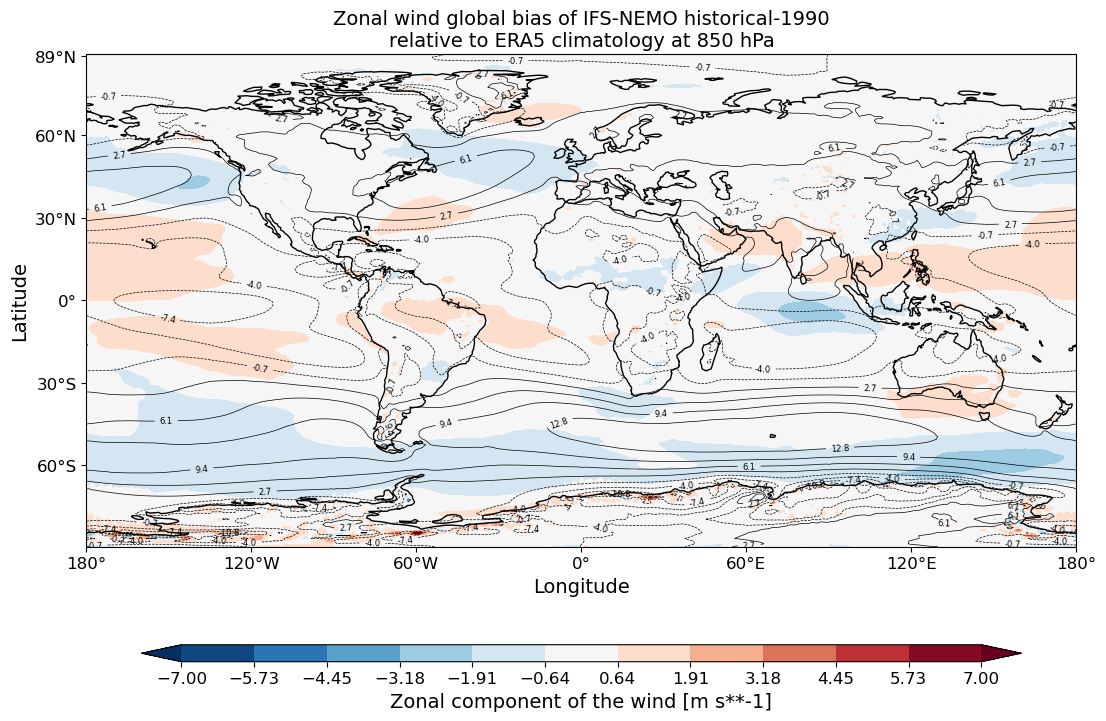

In [ ]:
title = (f"Zonal wind global bias of {model} {exp}\n"
         f"relative to {model_obs} climatology" + (f" at {int(plev / 100)} hPa" if plev else ""))

fig, ax = plot_single_map_diff(data=model_data['u'],
                               data_ref=era5_data['u'],
                               return_fig=True,
                               contour=True,
                               title=title,
                               sym=False,
                               vmin_fill=-7, vmax_fill=7)


ax.set_title(title, fontsize=14)

ax.set_xlabel("Longitude", fontsize=14)
ax.set_ylabel("Latitude", fontsize=14)


cbar_ax = fig.axes[1]  
cbar_ax.set_xlabel("Zonal component of the wind [m s**-1]", fontsize=14)

In [12]:
fig.savefig("zonal_wind_bias.pdf", format="pdf", bbox_inches="tight")